In [1]:
import pandas as pd
import plotly.figure_factory as ff
from lifelines import KaplanMeierFitter
import numpy as np

In [18]:
df = pd.read_csv('/Users/jedrzejkubica/calc/ubrite_hackathon2022/TCGA-PRAD.GDC_phenotype.tsv', sep='\t')

In [19]:
df = df[df['days_to_first_biochemical_recurrence'].notna()]

In [24]:
df['days_to_first_biochemical_recurrence']

1       990.0
6       950.0
24     2162.0
25     2162.0
27     1506.0
        ...  
605    1088.0
606    1088.0
613     308.0
616     537.0
621     819.0
Name: days_to_first_biochemical_recurrence, Length: 75, dtype: float64

In [26]:
columns = ['age_at_index',
    'days_to_birth',
    'days_to_death',
    'ethnicity',
    'gender',
    'race',
    'vital_status',
    'morphology',
    'primary_diagnosis',
    'ajcc_clinical_t',
    'ajcc_clinical_m',
    'ajcc_pathologic_t',
    'ajcc_pathologic_n',
    'primary_gleason_grade',
    'secondary_gleason_grade',
    'prior_malignancy',
    'prior_treatment',
    'site_of_resection_or_biopsy',
    'treatment_type']

In [27]:
df = df[columns]

In [28]:
df['days_to_death'] = np.where(df['vital_status'] == 'Alive' , 4000, df['days_to_death'])
df['days_to_death'] = np.where(df['vital_status'] == 'Not Reported' , 4000, df['days_to_death'])

In [29]:
df['days_to_death'].astype(int).unique()

array([4000, 3502,  628,  791, 1855,  728, 2469, 1329,  146,  875])

In [41]:
df['days_to_death']

0      4000
1      4000
2      3502
3      3502
4      4000
       ... 
971    4000
972    4000
973    4000
974    4000
975    4000
Name: days_to_death, Length: 976, dtype: object

In [30]:
df['vital_status'].replace({'Dead': 1, 'Alive': 0, 'Not Reported': 0}, inplace=True)

In [31]:
df['vital_status'].unique()

array([0, 1])

In [34]:
T = df[df['vital_status'] == 1]['days_to_death']

In [35]:
C = df[df['vital_status'] == 1]['vital_status']

In [36]:
len(T), len(C)

(18, 18)

In [37]:
kmf = KaplanMeierFitter()

In [38]:
kmf.fit(T, event_observed=C)

/Users/jedrzejkubica/opt/anaconda3/envs/ubrite/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 18 total observations, 0 right-censored observations>

In [39]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
146.0,0.888889
628.0,0.777778
728.0,0.666667
791.0,0.555556
875.0,0.444444
1329.0,0.333333
1855.0,0.222222
2469.0,0.111111


<AxesSubplot:xlabel='timeline'>

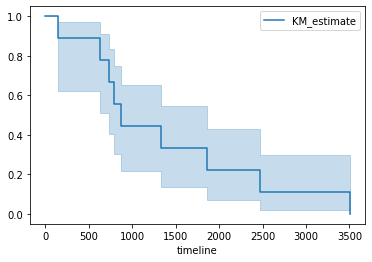

In [40]:
kmf.plot_survival_function()

In [43]:
df = pd.read_csv('TCGA-PRAD.GDC_phenotype.tsv', sep='\t')

In [46]:
list(df.columns)

['submitter_id.samples',
 'additional_pharmaceutical_therapy',
 'additional_radiation_therapy',
 'age_at_initial_pathologic_diagnosis',
 'batch_number',
 'bcr',
 'bcr_followup_barcode',
 'bcr_followup_uuid',
 'submitter_id',
 'biochemical_recurrence',
 'bone_scan_results',
 'clinical_M',
 'clinical_T',
 'day_of_dcc_upload',
 'day_of_form_completion',
 'days_to_bone_scan_performed',
 'days_to_diagnostic_computed_tomography_performed',
 'days_to_diagnostic_mri_performed',
 'days_to_first_biochemical_recurrence',
 'days_to_initial_pathologic_diagnosis',
 'days_to_new_tumor_event_after_initial_treatment',
 'days_to_psa',
 'days_to_second_biochemical_recurrence',
 'days_to_third_biochemical_recurrence',
 'diagnostic_ct_abd_pelvis_performed',
 'diagnostic_ct_abd_pelvis_result',
 'diagnostic_mri_performed',
 'file_uuid',
 'followup_case_report_form_submission_reason',
 'followup_treatment_success',
 'gleason_score',
 'histological_type_other',
 'history_of_neoadjuvant_treatment',
 'informed_c

In [47]:
df['vital_status.demographic']

0      Alive
1      Alive
2      Alive
3      Alive
4      Alive
       ...  
618    Alive
619    Alive
620    Alive
621    Alive
622    Alive
Name: vital_status.demographic, Length: 623, dtype: object